# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [1]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
# Create a new dataframe from your CSV
df = pd.read_csv('C:/Users/osimm/OneDrive/Desktop/Women+/DataCleaning_Exercises/cleaning-data/Rat_Sightings.csv')

In [2]:
# Print out any information you need to understand your dataframe

#shape and data types
print(df.shape)
print(df.dtypes)

(101914, 52)
Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                     float64
Status                             object
Due Date                           object
Resolution Action Updated Date     object
Community Board                    object
Borough              

In [3]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Unique Key' 'Incident Zip' 'Facility Type' 'X Coordinate (State Plane)'
 'Y Coordinate (State Plane)' 'School or Citywide Complaint'
 'Vehicle Type' 'Taxi Company Borough' 'Taxi Pick Up Location'
 'Bridge Highway Name' 'Bridge Highway Direction' 'Road Ramp'
 'Bridge Highway Segment' 'Garage Lot Name' 'Ferry Direction'
 'Ferry Terminal Name' 'Latitude' 'Longitude']


In [4]:
# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Created Date' 'Closed Date' 'Agency' 'Agency Name' 'Complaint Type'
 'Descriptor' 'Location Type' 'Incident Address' 'Street Name'
 'Cross Street 1' 'Cross Street 2' 'Intersection Street 1'
 'Intersection Street 2' 'Address Type' 'City' 'Landmark' 'Status'
 'Due Date' 'Resolution Action Updated Date' 'Community Board' 'Borough'
 'Park Facility Name' 'Park Borough' 'School Name' 'School Number'
 'School Region' 'School Code' 'School Phone Number' 'School Address'
 'School City' 'School State' 'School Zip' 'School Not Found' 'Location']


Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<AxesSubplot:>

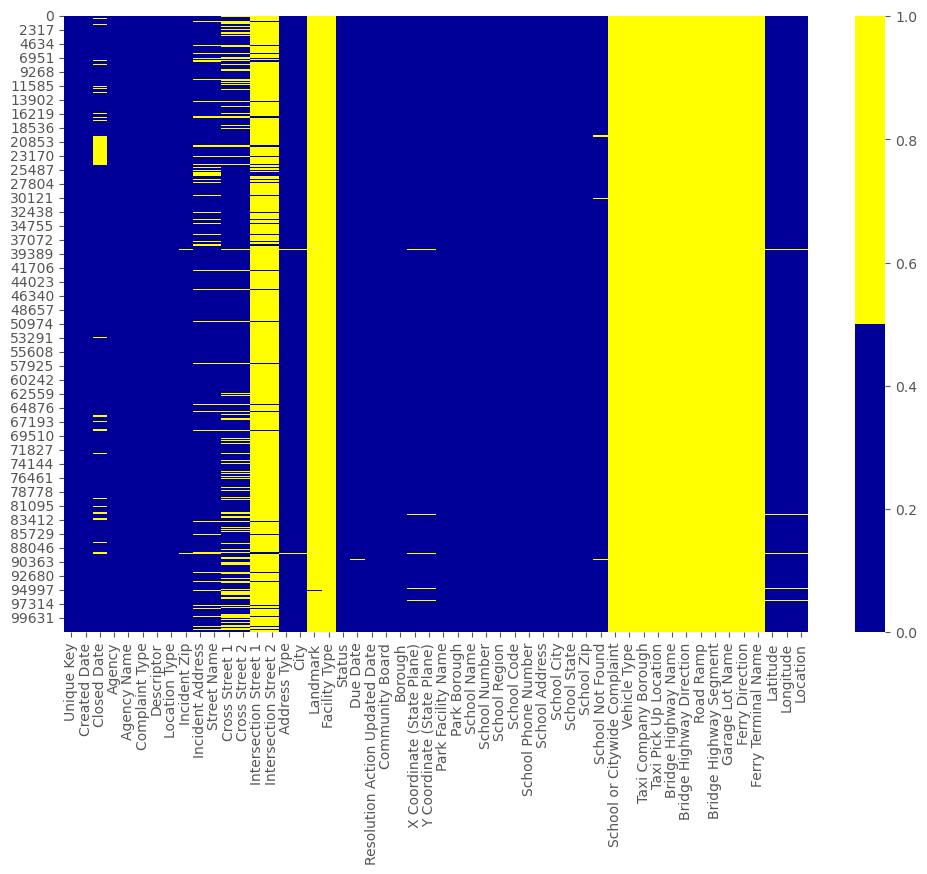

In [5]:
# Plot a heatmap of any missing data
cols = df.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [6]:
# Try out a missing data percentage list! 

# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unique Key - 0%
Created Date - 0%
Closed Date - 11%
Agency - 0%
Agency Name - 0%
Complaint Type - 0%
Descriptor - 0%
Location Type - 0%
Incident Zip - 0%
Incident Address - 9%
Street Name - 9%
Cross Street 1 - 16%
Cross Street 2 - 16%
Intersection Street 1 - 91%
Intersection Street 2 - 91%
Address Type - 0%
City - 0%
Landmark - 100%
Facility Type - 100%
Status - 0%
Due Date - 0%
Resolution Action Updated Date - 0%
Community Board - 0%
Borough - 0%
X Coordinate (State Plane) - 1%
Y Coordinate (State Plane) - 1%
Park Facility Name - 0%
Park Borough - 0%
School Name - 0%
School Number - 0%
School Region - 0%
School Code - 0%
School Phone Number - 0%
School Address - 0%
School City - 0%
School State - 0%
School Zip - 0%
School Not Found - 1%
School or Citywide Complaint - 100%
Vehicle Type - 100%
Taxi Company Borough - 100%
Taxi Pick Up Location - 100%
Bridge Highway Name - 100%
Bridge Highway Direction - 100%
Road Ramp - 100%
Bridge Highway Segment - 100%
Garage Lot Name - 100%
Ferry Dire

From the missing data percentages I can see that 13 columns hae 100% missing data. 

created missing indicator for: Closed Date
created missing indicator for: Location Type
created missing indicator for: Incident Zip
created missing indicator for: Incident Address
created missing indicator for: Street Name
created missing indicator for: Cross Street 1
created missing indicator for: Cross Street 2
created missing indicator for: Intersection Street 1
created missing indicator for: Intersection Street 2
created missing indicator for: Address Type
created missing indicator for: City
created missing indicator for: Landmark
created missing indicator for: Facility Type
created missing indicator for: Due Date
created missing indicator for: Resolution Action Updated Date
created missing indicator for: X Coordinate (State Plane)
created missing indicator for: Y Coordinate (State Plane)
created missing indicator for: School Not Found
created missing indicator for: School or Citywide Complaint
created missing indicator for: Vehicle Type
created missing indicator for: Taxi Company 

<AxesSubplot:xlabel='index'>

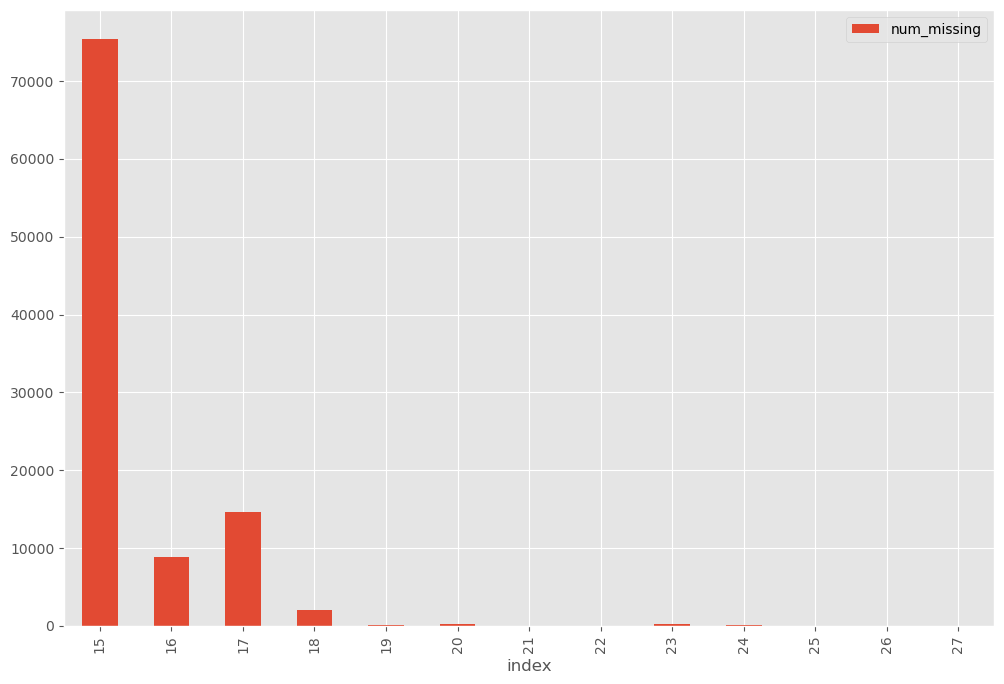

In [7]:
# Plot a missing data histogram

# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing

# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [13]:
# Handle any missing data in your dataframe.



# Drop Collumns with 100% missing values
cols_to_drop = ['Landmark', 
                'Facility Type', 
                'School or Citywide Complaint',
                'Vehicle Type',
                'Taxi Company Borough',
                'Taxi Pick Up Location',
                'Bridge Highway Name',
                'Bridge Highway Direction',
                'Road Ramp',
                'Bridge Highway Segment',
                'Garage Lot Name',
                'Ferry Direction',
                'Ferry Terminal Name',
                'Intersection Street 1',
                'Intersection Street 2'
               ]
df_dropped_emp_cols = df.drop(cols_to_drop, axis=1)
print(df_dropped_emp_cols.shape)
print(df.shape)

(101914, 70)
(101914, 85)


## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

In [17]:
df_dropped_emp_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101914 entries, 0 to 101913
Data columns (total 70 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Unique Key                                101914 non-null  int64  
 1   Created Date                              101914 non-null  object 
 2   Closed Date                               90983 non-null   object 
 3   Agency                                    101914 non-null  object 
 4   Agency Name                               101914 non-null  object 
 5   Complaint Type                            101914 non-null  object 
 6   Descriptor                                101914 non-null  object 
 7   Location Type                             101908 non-null  object 
 8   Incident Zip                              101578 non-null  float64
 9   Incident Address                          92840 non-null   object 
 10  Street Name         

In [18]:
df_dropped_emp_cols.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction_ismissing,Road Ramp_ismissing,Bridge Highway Segment_ismissing,Garage Lot Name_ismissing,Ferry Direction_ismissing,Ferry Terminal Name_ismissing,Latitude_ismissing,Longitude_ismissing,Location_ismissing,num_missing
0,31464015,09/04/2015 12:00:00 AM,09/18/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006.0,NaN,...,True,True,True,True,True,True,False,False,False,17
1,31464024,09/04/2015 12:00:00 AM,10/28/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306.0,2270 HYLAN BOULEVARD,...,True,True,True,True,True,True,False,False,False,17
2,31464025,09/04/2015 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310.0,758 POST AVENUE,...,True,True,True,True,True,True,False,False,False,16
3,31464026,09/04/2015 12:00:00 AM,09/14/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206.0,198 SCHOLES STREET,...,True,True,True,True,True,True,False,False,False,15
4,31464027,09/04/2015 12:00:00 AM,09/22/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462.0,2138 WALLACE AVENUE,...,True,True,True,True,True,True,False,False,False,15


<AxesSubplot:>

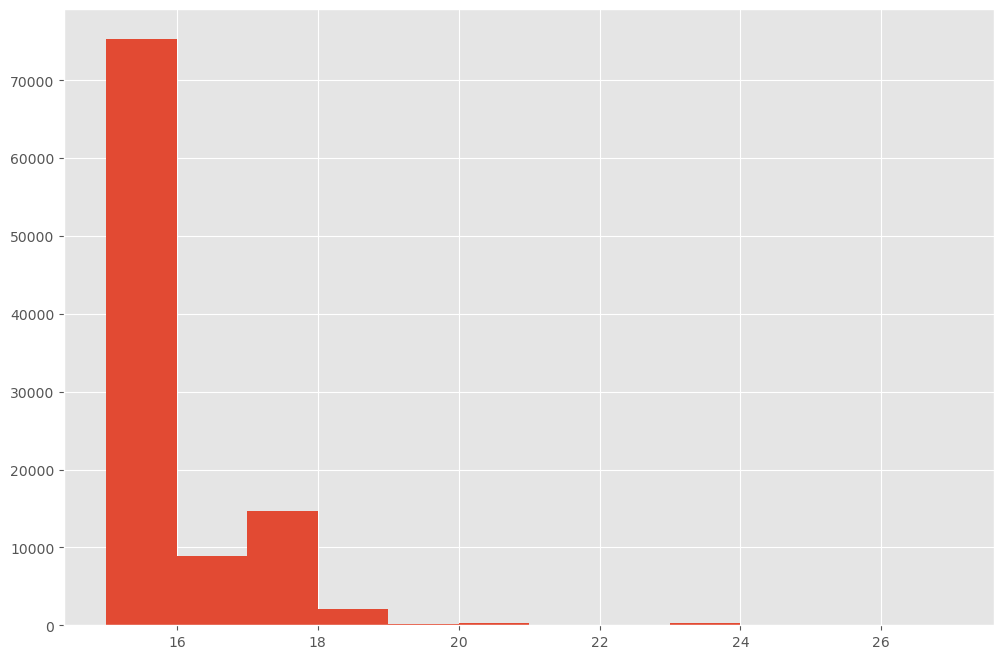

In [22]:
# Plot a histogram to see if there are any outliers.

df['num_missing'].hist(bins=12)

In [20]:
# Use the describe() method
df['num_missing'].describe()


count    101914.000000
mean         15.491974
std           0.996092
min          15.000000
25%          15.000000
50%          15.000000
75%          16.000000
max          27.000000
Name: num_missing, dtype: float64

<AxesSubplot:>

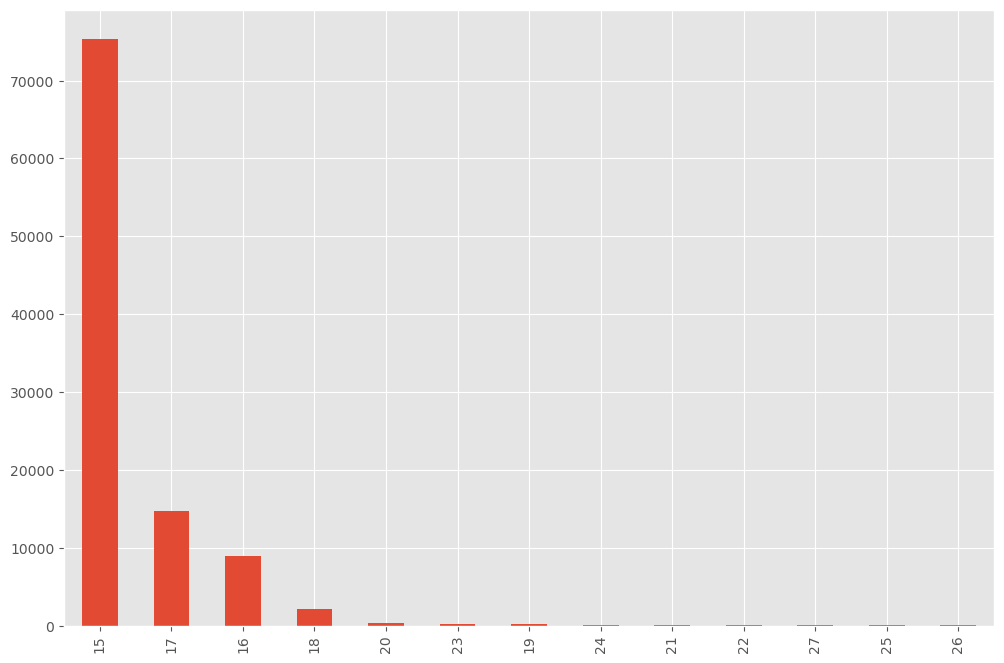

In [24]:
# Plot a bar chart
df['num_missing'].value_counts().plot.bar()

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [25]:
# Handle any outliers in your dataframe

df_num_missing_log = np.log(df['num_missing'])
print(df['num_missing'].head())
print(df_num_missing_log.head())

0    17
1    17
2    16
3    15
4    15
Name: num_missing, dtype: int64
0    2.833213
1    2.833213
2    2.772589
3    2.708050
4    2.708050
Name: num_missing, dtype: float64


<AxesSubplot:xlabel='num_missing'>

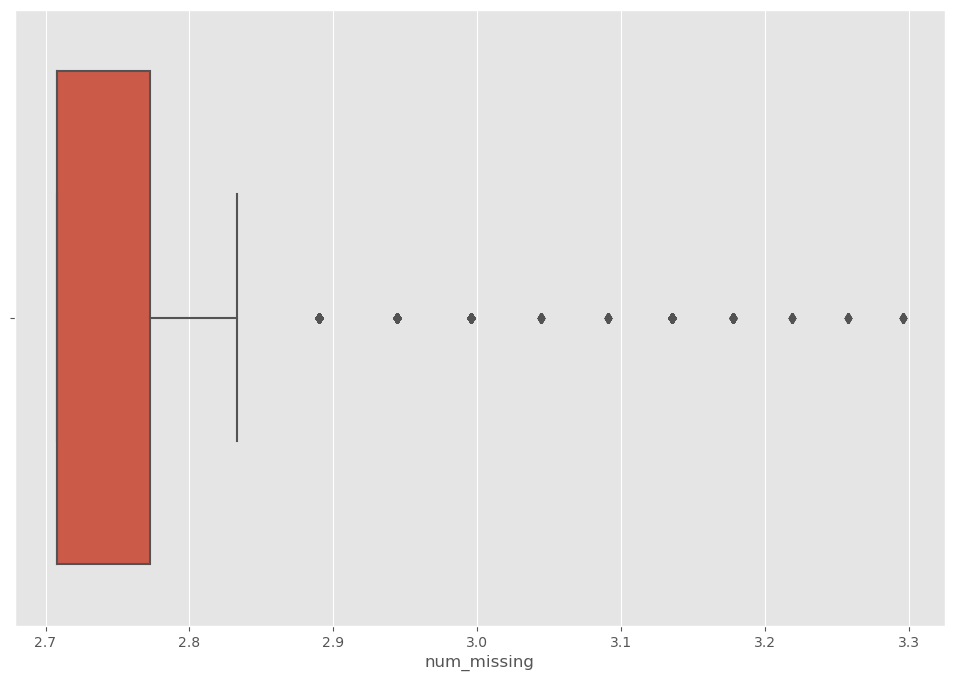

In [26]:
sns.boxplot(x=df_num_missing_log)

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [30]:
# Look for any irrelevant data in the dataframe. How will you handle it?
df_dropped_emp_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101914 entries, 0 to 101913
Data columns (total 70 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Unique Key                                101914 non-null  int64  
 1   Created Date                              101914 non-null  object 
 2   Closed Date                               90983 non-null   object 
 3   Agency                                    101914 non-null  object 
 4   Agency Name                               101914 non-null  object 
 5   Complaint Type                            101914 non-null  object 
 6   Descriptor                                101914 non-null  object 
 7   Location Type                             101908 non-null  object 
 8   Incident Zip                              101578 non-null  float64
 9   Incident Address                          92840 non-null   object 
 10  Street Name         

location/city and num_missing might be the only useful information

In [31]:
# Look for duplicates. How will you handle any duplicates?


# we know that column 'id' is unique, but what if we drop it?
df_dedupped = df_dropped_emp_cols.drop('Unique Key', axis=1).drop_duplicates()

# there were duplicate rows
print(df.shape)
print(df_dedupped.shape)

(101914, 85)
(101912, 69)


In [ ]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?

#Certain things like longitude and latitude and pick up location are
#uninformative descripters of a location

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [32]:
# Try to convert all the strings in a column to lower or upper case. 

df['Incident Address'].value_counts(dropna=False)

NaN                        9074
2131 WALLACE AVENUE         186
95 EASTERN PARKWAY          176
651 BROOKLYN AVENUE         127
2486 DAVIDSON AVE            88
                           ... 
1271 HAVEMEYER AVENUE         1
2062 STRANG AVENUE            1
78-40 164 STREET              1
1357 SOUTHERN BOULEVARD       1
1117 HANCOCK STREET           1
Name: Incident Address, Length: 51602, dtype: int64

In [33]:
#make everything lower case
df['Incident Address_lower'] = df['Incident Address'].str.lower()
df['Incident Address_lower'].value_counts(dropna=False)

NaN                        9074
2131 wallace avenue         186
95 eastern parkway          176
651 brooklyn avenue         127
2486 davidson ave            88
                           ... 
1271 havemeyer avenue         1
2062 strang avenue            1
78-40 164 street              1
1357 southern boulevard       1
1117 hancock street           1
Name: Incident Address_lower, Length: 51602, dtype: int64